### Comparing the Sea Surface Temperature in the Northern Great Barrier Reef with the Central Great Barrier Reef

#### The comparison is made for the summer months (Dec-Mar) for the Last Five Years

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
# Importing the Northern GBR data and setting the date as index colum
northern = pd.read_fwf('Resources/gbr_northern.txt')
northern = northern.rename(columns={'YYYY': 'Year',
                           'MM': 'Month',
                           'DD': 'Day'
                          })

northern['Date'] = northern['Month'].astype(str)+ '/'+ northern['Day'].astype(str) \
                    + '/' + northern['Year'].astype(str)

northern = northern[['Date','SST@90th_HS']]
northern = northern.set_index('Date')

In [3]:
# Filtering the data for the summer months (Dec-Mar) for last five years
summer_2015_16 = northern.loc['12/1/2015':'3/31/2016']
summer_2016_17 = northern.loc['12/1/2016':'3/31/2017']
summer_2017_18 = northern.loc['12/1/2017':'3/31/2018']
summer_2018_19 = northern.loc['12/1/2018':'3/31/2019']
summer_2019_20 = northern.loc['12/1/2019':'3/31/2020']
summer_2015_16_df = summer_2015_16.reset_index()
summer_2016_17_df = summer_2016_17.reset_index()
summer_2017_18_df = summer_2017_18.reset_index()
summer_2018_19_df = summer_2018_19.reset_index()
summer_2019_20_df = summer_2019_20.reset_index()
summer_2015_16_df['Year'] = '2015-16'
summer_2016_17_df['Year'] = '2016-17'
summer_df = pd.merge(summer_2015_16_df, summer_2016_17_df,how='outer') #merging df for 2015_16 and 2016_17
summer_2017_18_df['Year'] = '2017-18'
summer_df = pd.merge(summer_df, summer_2017_18_df, how='outer')
summer_2018_19_df['Year'] = '2018-19'
summer_df = pd.merge(summer_df, summer_2018_19_df, how='outer')
summer_2019_20_df['Year'] = '2019-20'
summer_northern = pd.merge(summer_df, summer_2019_20_df, how='outer') #data for all 5 years
summer_northern.head()

,Date,SST@90th_HS,Year
0,12/1/2015,28.32,2015-16
1,12/2/2015,27.85,2015-16
2,12/3/2015,28.06,2015-16
3,12/4/2015,27.93,2015-16
4,12/5/2015,28.24,2015-16


In [4]:
# Import the data for the summer months for Central GBR region. 
#This data was saved using code in 'Central_GBR.ipynb'

summer_central = pd.read_csv('Output/DataFiles/Summer_DF_Central_GBR.csv')
summer_central.head()

,Date,SST@90th_HS,Year
0,12/1/2015,27.99,2015-16
1,12/2/2015,27.76,2015-16
2,12/3/2015,27.88,2015-16
3,12/4/2015,27.83,2015-16
4,12/5/2015,28.14,2015-16


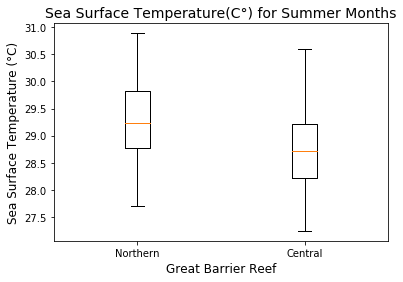

In [5]:
# Creating a box plot to compare the summer months for the 2 regions for the last five years
plt.boxplot([summer_northern['SST@90th_HS'], summer_central['SST@90th_HS']],
            labels=['Northern', 'Central'])
plt.xlabel('Great Barrier Reef', fontsize='12')
plt.ylabel('Sea Surface Temperature (°C)', fontsize='12')
plt.title('Sea Surface Temperature(C°) for Summer Months', fontsize='14')
plt.savefig('Output/SavedPlots/Northern_Central_Boxplot.png')
plt.show()

In [6]:
# Mean Values for SST
northern_mean = summer_northern['SST@90th_HS'].mean()
central_mean = summer_central['SST@90th_HS'].mean()

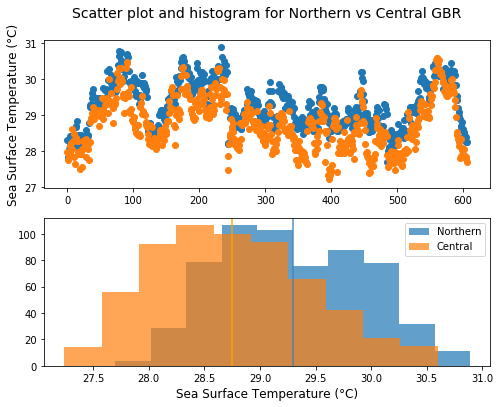

The mean SST for Northern GBR is 29.3°C      and mean SST for Central GBR is 28.75°C


In [7]:
#Scatter plot and histogram for Northern vs Central GBR
fig, axes= plt.subplots(nrows=2, ncols=1,figsize=(8,6))

axes[0].set_title('Scatter plot and histogram for Northern vs Central GBR\n', fontsize='14')
axes[0].scatter(range(len(summer_northern['SST@90th_HS'])), summer_northern['SST@90th_HS'],label="Northern")
axes[0].scatter(range(len(summer_central['SST@90th_HS'])), summer_central['SST@90th_HS'],label="Central")
axes[0].set_ylabel('Sea Surface Temperature (°C)', fontsize='12')

n_hist = axes[1].hist(summer_northern['SST@90th_HS'],alpha=0.7, label="Northern")
c_hist = axes[1].hist(summer_central['SST@90th_HS'],alpha=0.7,label="Central")
axes[1].set_xlabel('Sea Surface Temperature (°C)', fontsize='12')
axes[1].axvline(northern_mean, color='steelblue', alpha = 0.9)
axes[1].axvline(central_mean, color='orange', alpha = 0.9)
plt.legend()
plt.savefig('Output/SavedPlots/Northern_Central.png')
plt.show()

print(f'The mean SST for Northern GBR is {round(northern_mean,2)}°C\
      and mean SST for Central GBR is {round(central_mean,2)}°C')

#### Using Independent T-Test

Null Hypothesis: There is no statistical difference between the Sea Surface Temperature for Northern GBR and Central GBR for the summer months

Alternate Hypothesis: Sea Surface Temperature at Northern GBR is different from Central GBR

In [8]:
sts.ttest_ind(summer_northern['SST@90th_HS'], summer_central['SST@90th_HS'], equal_var=False)

Ttest_indResult(statistic=14.29023341559509, pvalue=6.520296304360302e-43)

Assuming 5% significance level, we reject the Null Hypothesis as pvalue < 0.05